## Set up notebook

In [1]:
#import shutil
#shutil.rmtree('/storage/test-data-set')

In [2]:
import fastbook
fastbook.setup_book()
from fastbook import *
from fastai.vision.all import *
from fastai.vision.widgets import *

## Download and unzip data

In [3]:
#source = untar_data('https://data.mendeley.com/public-files/datasets/tywbtsjrjv/files/d5652a28-c1d8-4b76-97f3-72fb80f94efc/file_downloaded','Plant_leaf_diseases_dataset_without_augmentation.zip')

In [4]:
#source

In [5]:
path = Path('/storage/data/plants')

## Clean data

TO DO:
-figure out how to do multiple labels (i.e. class tomato with a sub-class of the disease)

In [6]:
#def label_func(fname):
#    return "cat" if fname.name[0].isupper() else "dog"

In [7]:
fns = get_image_files(path)

In [8]:
fns

(#55448) [Path('/storage/data/plants/Corn___Northern_Leaf_Blight/image (55).jpg'),Path('/storage/data/plants/Corn___Northern_Leaf_Blight/image (37).jpg'),Path('/storage/data/plants/Corn___Northern_Leaf_Blight/image (23).JPG'),Path('/storage/data/plants/Corn___Northern_Leaf_Blight/image (167).JPG'),Path('/storage/data/plants/Corn___Northern_Leaf_Blight/image (658).JPG'),Path('/storage/data/plants/Corn___Northern_Leaf_Blight/image (980).JPG'),Path('/storage/data/plants/Corn___Northern_Leaf_Blight/image (415).JPG'),Path('/storage/data/plants/Corn___Northern_Leaf_Blight/image (796).jpg'),Path('/storage/data/plants/Corn___Northern_Leaf_Blight/image (301).JPG'),Path('/storage/data/plants/Corn___Northern_Leaf_Blight/image (182).JPG')...]

In [9]:
#failed = verify_images(fns)
#failed

In [10]:
#failed.map(Path.unlink);

## Turn data into Datablock and load into DataLoader object

Create Datablock object with plant images, label them with their parent folder name and transform them to ensure they are all 128x128px

In [11]:
plants = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

Create Dataloader object from the plant folder (path)

In [12]:
dls = plants.dataloaders(path)

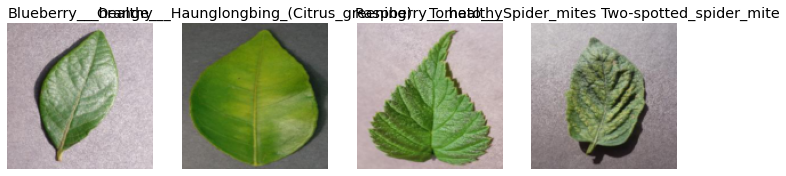

In [13]:
dls.valid.show_batch(max_n=4, nrows=1)

## Train Model

Create learner

In [14]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,time
0,0.405360,0.220084,0.072865,01:04


epoch,train_loss,valid_loss,error_rate,time
0,0.141406,0.075847,0.023988,01:17
1,0.094801,0.071192,0.022004,01:14
2,0.034496,0.036813,0.011723,01:14
3,0.012067,0.026897,0.007755,01:15
4,0.002981,0.024471,0.006854,01:16


## Export Model

In [22]:
learn.export()

In [16]:
#plants = plants.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
#dls = plants.dataloaders(path)
#dls.train.show_batch(max_n=4, nrows=1, unique=True)

## Does using a different architecture improve error rate?

resnet34

In [21]:
learn_resnet32 = cnn_learner(dls, resnet34, metrics=error_rate)
learn_resnet32.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,time
0,0.432158,0.223080,0.074488,01:34


epoch,train_loss,valid_loss,error_rate,time
0,0.134565,0.074356,0.023898,01:57
1,0.092988,0.058412,0.019749,01:58
2,0.034881,0.029615,0.008116,01:58
3,0.009866,0.020027,0.004689,01:58
4,0.002659,0.018128,0.004238,01:58


In [26]:
learn_resnet32.export(fname='export_plant_resnet32.pkl')


yes!


## Does augmenting data increase error rate?

In [ ]:
#plants2 = plants.new(
#    item_tfms=RandomResizedCrop(224, min_scale=0.5),
#    batch_tfms=aug_transforms())

#dls2 = plants2.dataloaders(path)
#dls2.train.show_batch(max_n=4, nrows=1, unique=True)

In [ ]:
#learn2 = cnn_learner(dls2, resnet18, metrics=error_rate)
#learn2.fine_tune(5)

*Not in this case*

## Confusion Matrix

See which categories were mostly misclassified

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

See which images had highest loss

In [ ]:
interp.plot_top_losses(5, nrows=1)

## Use model to clean data

Tag files which need to be cleaned

In [ ]:
cleaner = ImageClassifierCleaner(learn)
cleaner

Unlink or relabel files

## Export model